In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [28]:
pd.set_option('display.max_columns', 100)

In [29]:
df = pd.read_csv('Smart_Farming_Crop_Yield_2024.csv')
df

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,fertilizer_type,pesticide_usage_ml,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organic,6.34,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,Inorganic,9.60,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,Mixed,15.26,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,Organic,25.80,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,Mixed,25.65,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,FARM0496,Central USA,Rice,42.85,6.70,30.85,52.35,79.58,7.25,Manual,Mixed,8.82,2024-01-16,2024-06-02,138,4251.40,SENS0496,2024-05-08,30.386623,76.147700,0.59,Mild
496,FARM0497,North India,Soybean,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organic,5.05,2024-01-01,2024-04-14,104,3708.54,SENS0497,2024-01-19,18.832748,75.736924,0.85,Severe
497,FARM0498,North India,Cotton,15.93,5.72,17.03,288.96,57.87,7.69,Drip,Inorganic,46.55,2024-01-02,2024-05-09,128,2604.41,SENS0498,2024-04-20,23.262016,81.992230,0.71,Mild
498,FARM0499,Central USA,Soybean,38.61,6.20,17.08,279.06,73.09,9.60,Drip,Organic,43.78,2024-01-25,2024-06-04,131,2586.36,SENS0499,2024-03-02,19.764989,84.426869,0.77,Severe


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [31]:
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded with 500 rows and 22 columns


In [32]:
df.describe().style.background_gradient(cmap = "Blues")

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.030140,26.586980,119.496000,4032.926940,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.691670,13.202429,16.798046,1174.433040,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.010000,5.050000,90.000000,2023.560000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.667500,14.945000,105.750000,2994.820000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.995000,25.980000,119.000000,4071.690000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.470000,38.005000,134.000000,5062.110000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.000000,49.940000,150.000000,5998.290000,34.981531,89.991901,0.900000


In [33]:
print(f"Missing values:\n{df.isna().sum()}")

Missing values:
farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64


In [34]:
df['irrigation_type'].value_counts()

irrigation_type
Sprinkler    121
Manual       118
Drip         111
Name: count, dtype: int64

In [35]:
df['crop_disease_status'].value_counts()

crop_disease_status
Severe      133
Mild        125
Moderate    112
Name: count, dtype: int64

In [36]:
df['irrigation_type'].fillna(df['irrigation_type'].mode()[0], inplace=True)
df['crop_disease_status'].fillna(df['crop_disease_status'].mode()[0], inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       500 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [38]:
df.drop(columns=['farm_id', 'sensor_id', 'timestamp'], inplace=True)

In [39]:
date_features = ['sowing_date', 'harvest_date']
for col in date_features:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    
df[date_features].dtypes

sowing_date     datetime64[ns]
harvest_date    datetime64[ns]
dtype: object

In [40]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features = [col for col in categorical_features if col not in date_features]
categorical_features

['region',
 'crop_type',
 'irrigation_type',
 'fertilizer_type',
 'crop_disease_status']

In [41]:
numerical_features = df.select_dtypes(include='float64').columns.tolist()
numerical_features = [col for col in numerical_features if col not in date_features]
numerical_features

['soil_moisture_%',
 'soil_pH',
 'temperature_C',
 'rainfall_mm',
 'humidity_%',
 'sunlight_hours',
 'pesticide_usage_ml',
 'yield_kg_per_hectare',
 'latitude',
 'longitude',
 'NDVI_index']

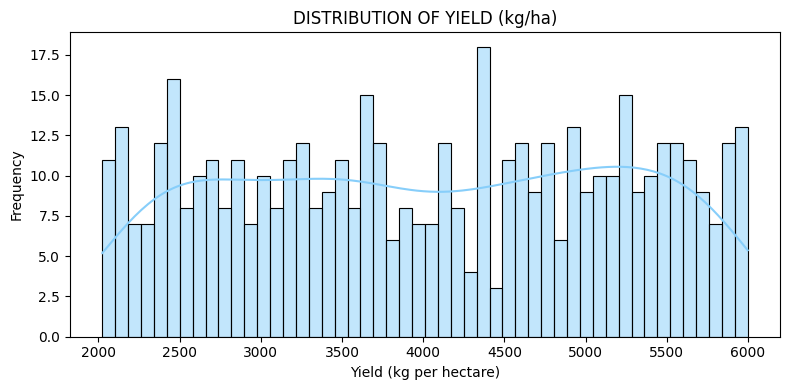

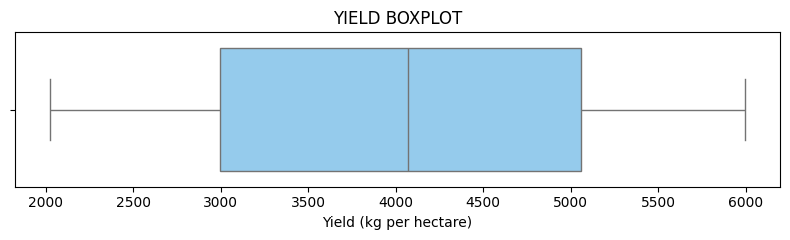

In [48]:
plt.figure(figsize=(8, 4))
sns.histplot(df['yield_kg_per_hectare'], bins=50, kde=True, color='lightskyblue')
plt.title('DISTRIBUTION OF YIELD (kg/ha)')
plt.xlabel('Yield (kg per hectare)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 2.5))
sns.boxplot(x=df['yield_kg_per_hectare'], color='lightskyblue')
plt.title('YIELD BOXPLOT')
plt.xlabel('Yield (kg per hectare)')
plt.tight_layout()
plt.show()

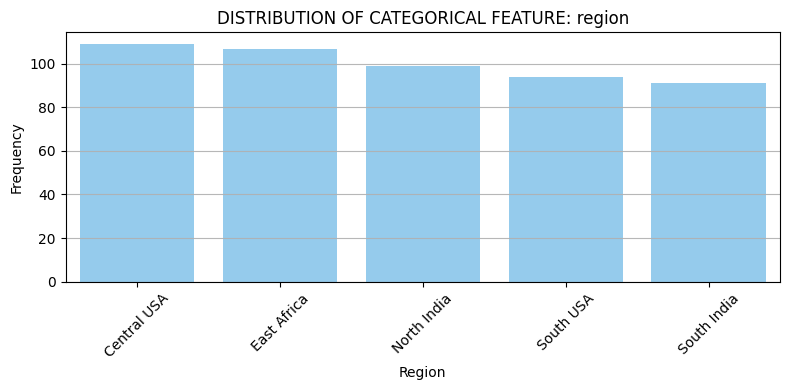

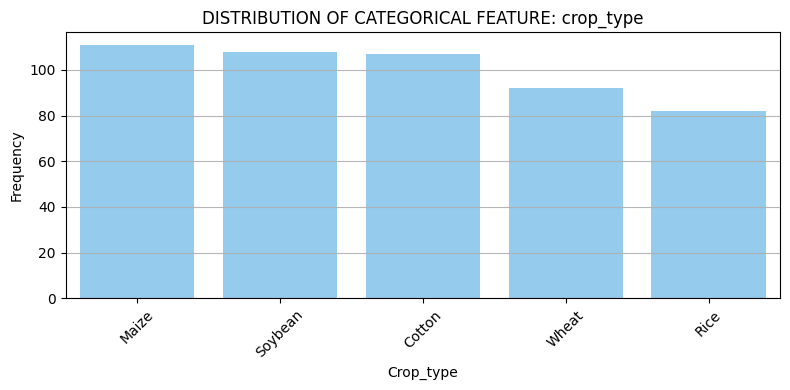

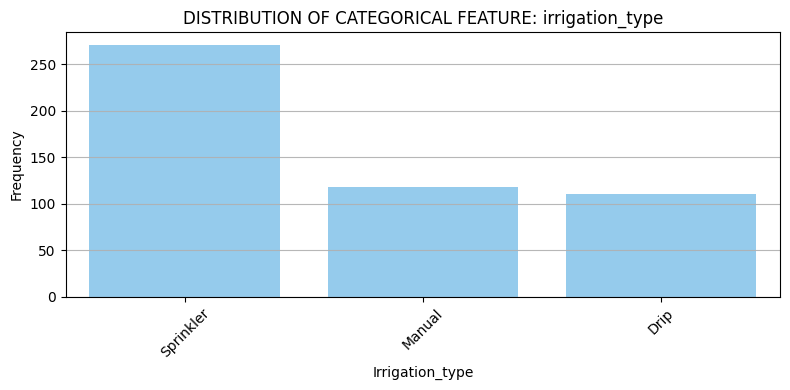

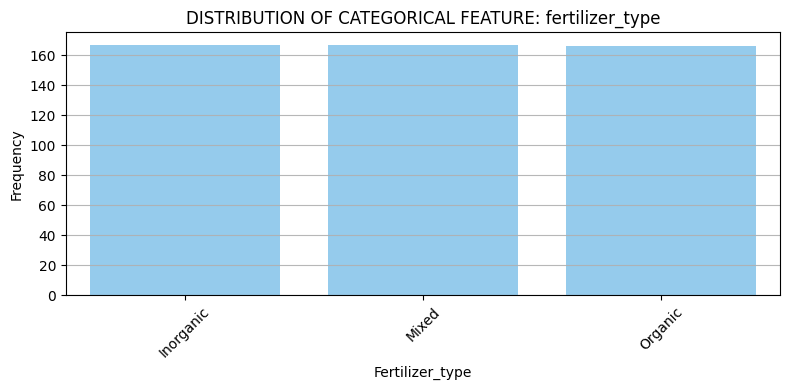

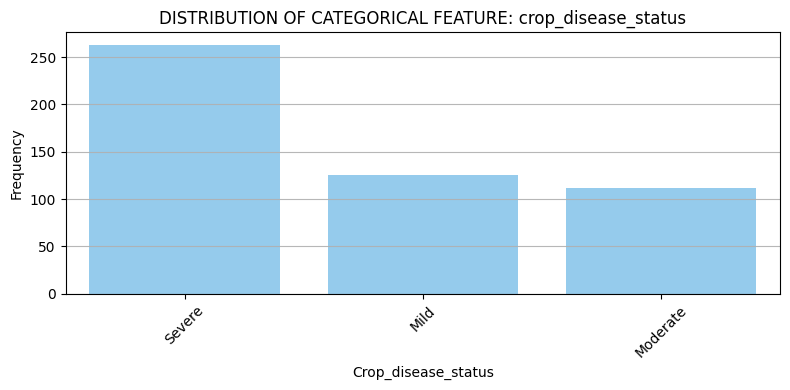

In [43]:
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    order = df[col].value_counts().index  # Ordenar de mayor a menor
    sns.countplot(data=df, x=col, order=order, color='lightskyblue')
    plt.title(f'DISTRIBUTION OF CATEGORICAL FEATURE: {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='-', alpha=0.9)  # 👈 Rejilla horizontal suave
    plt.tight_layout()
    plt.show()

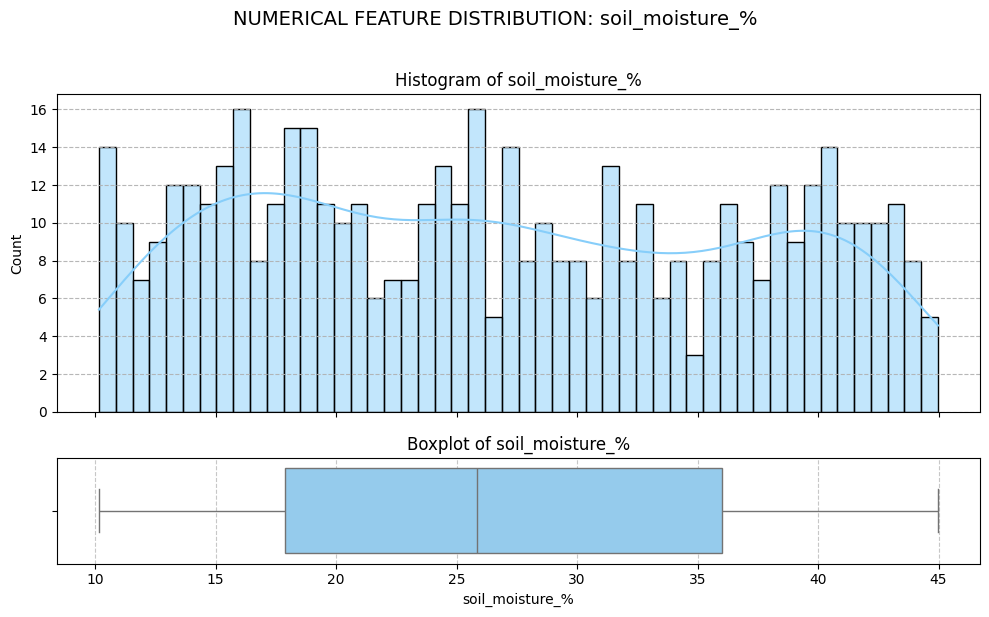

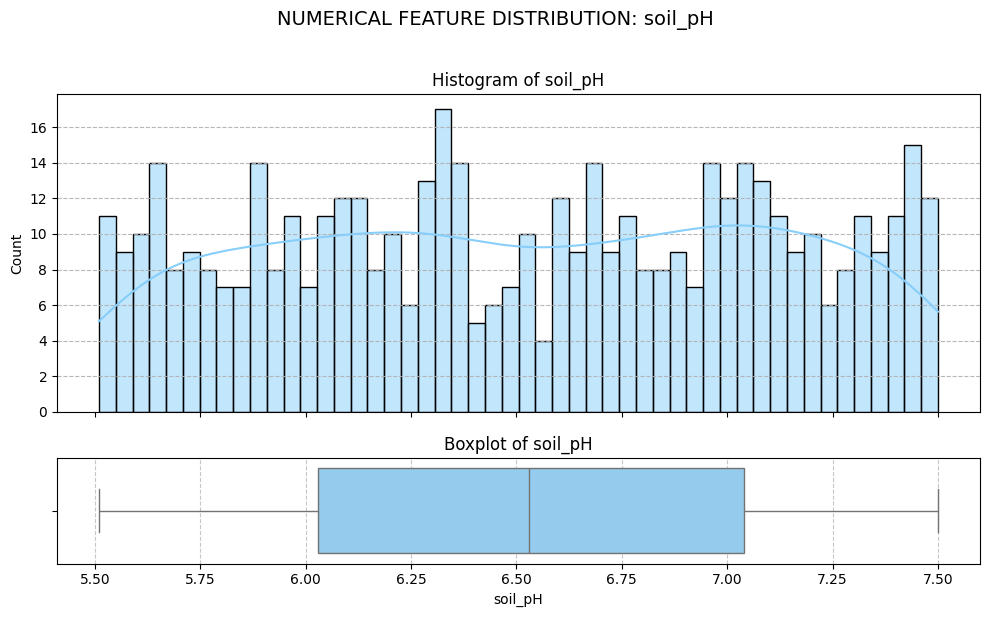

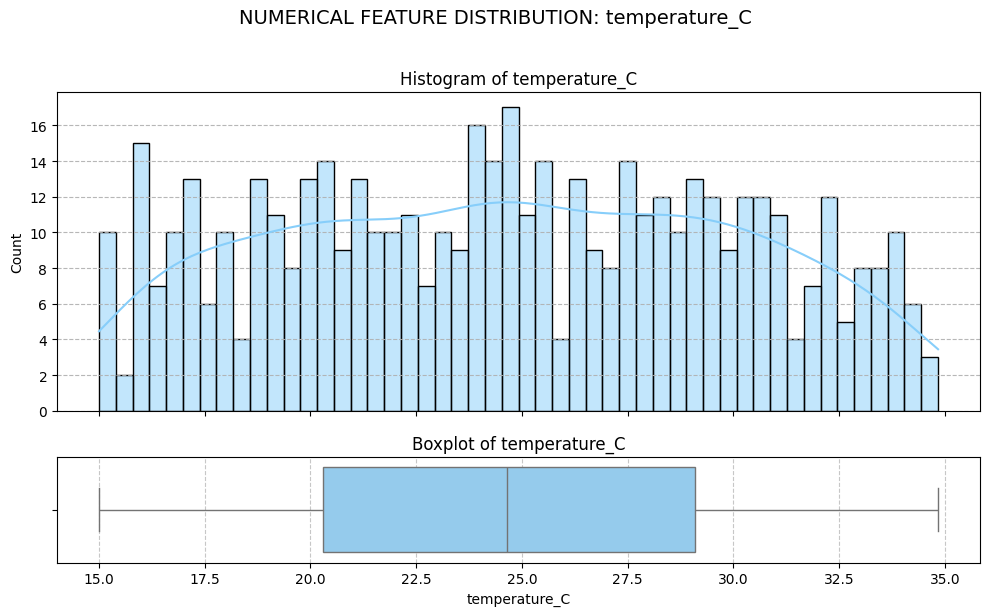

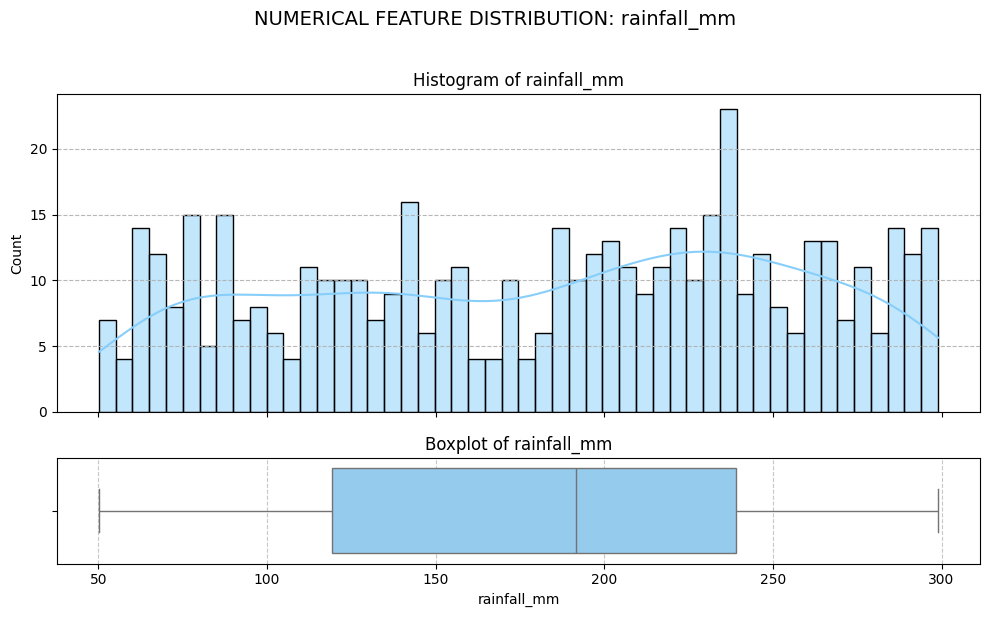

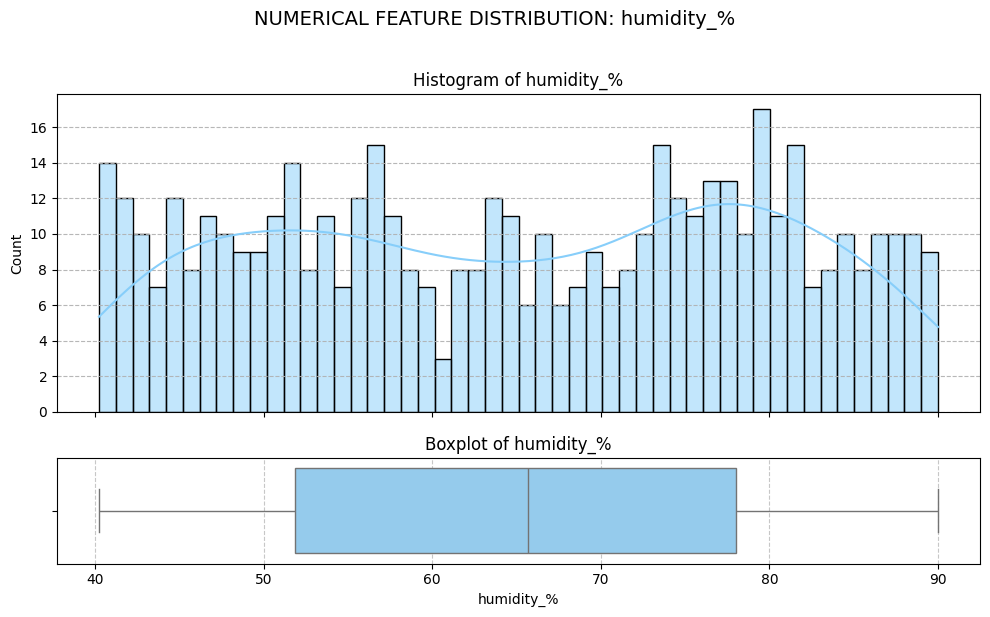

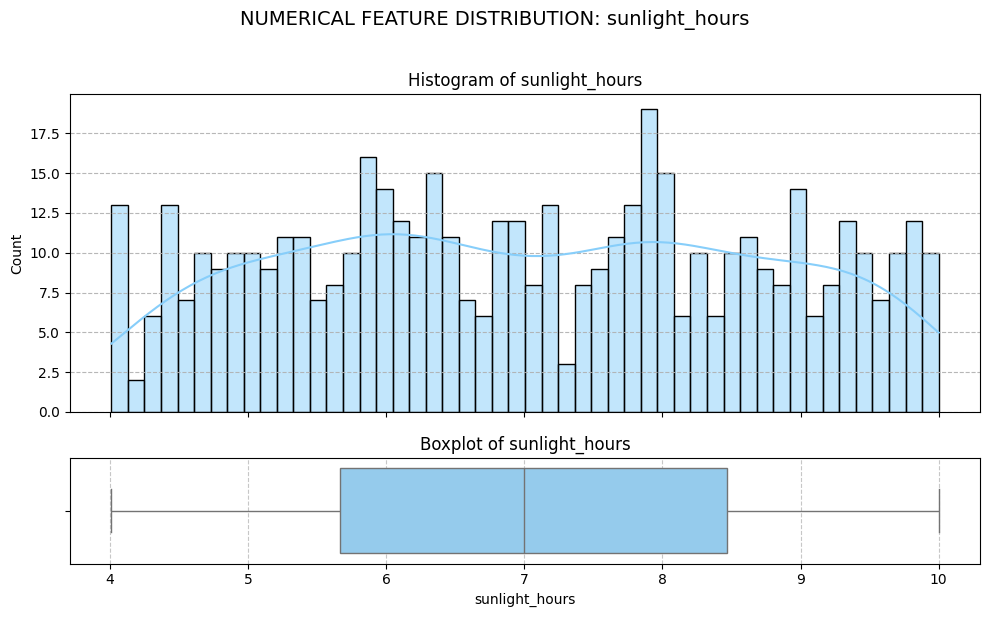

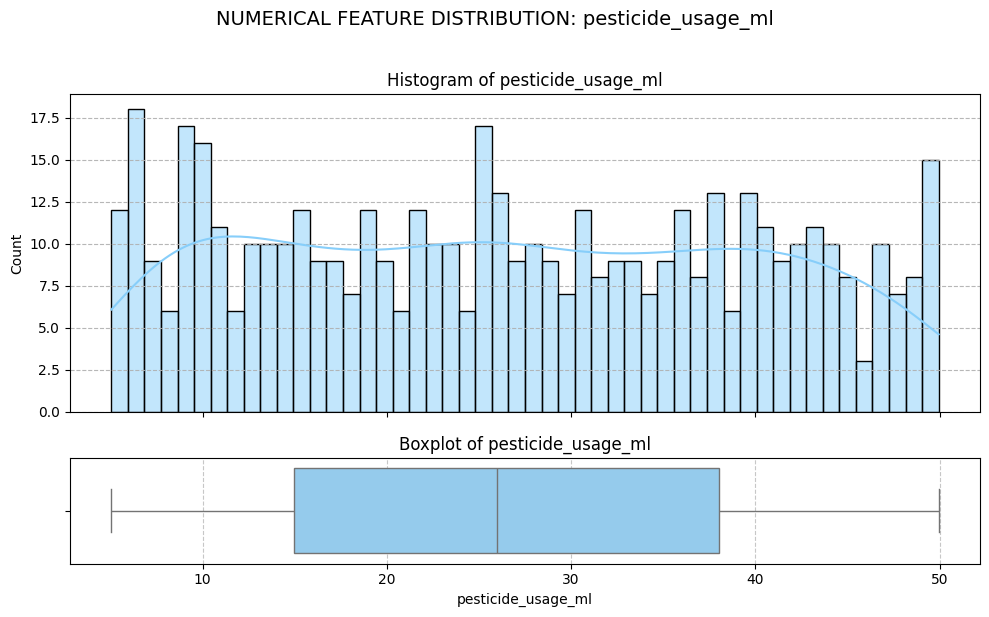

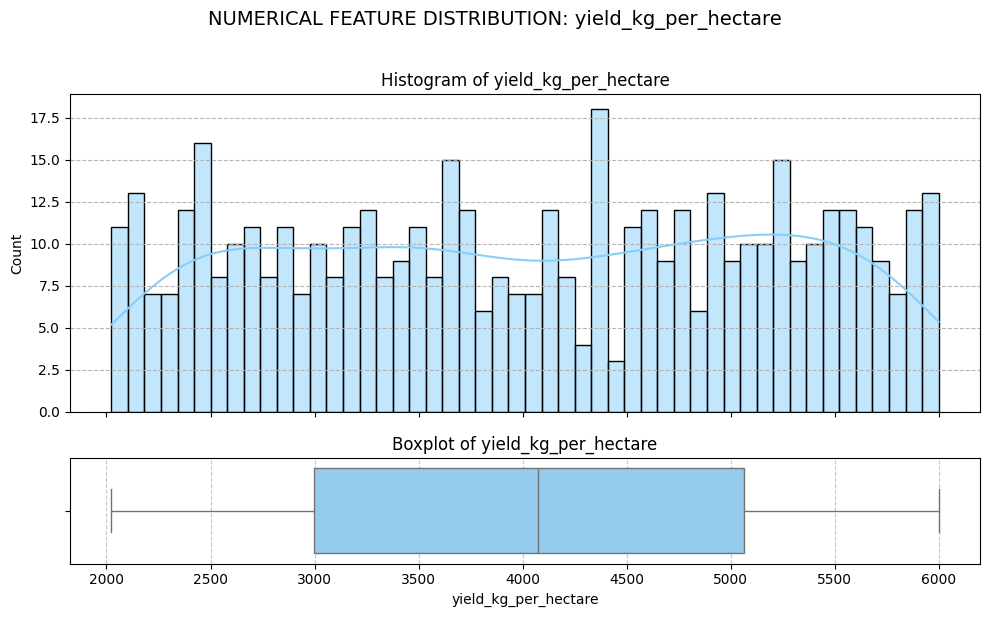

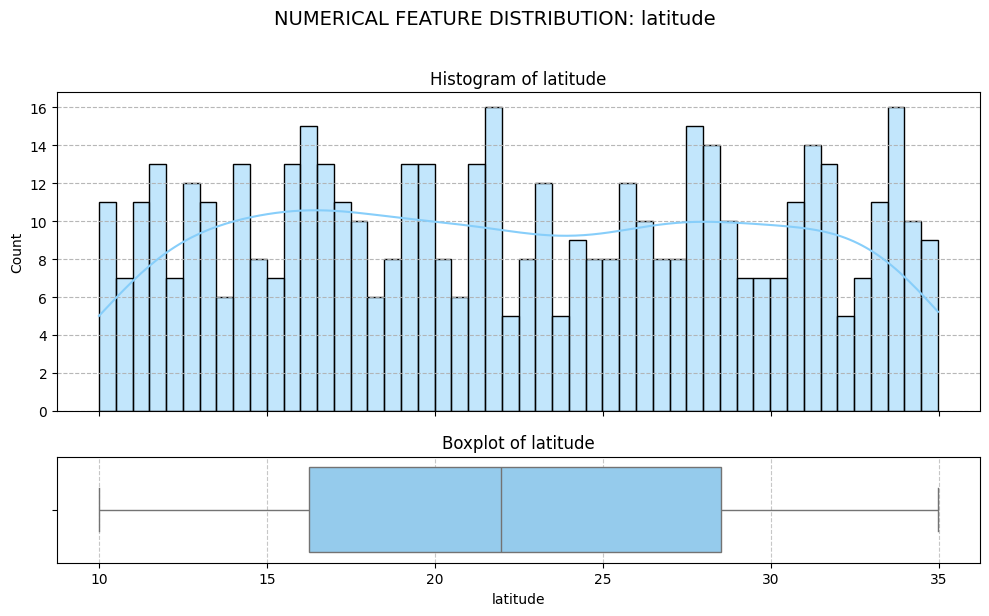

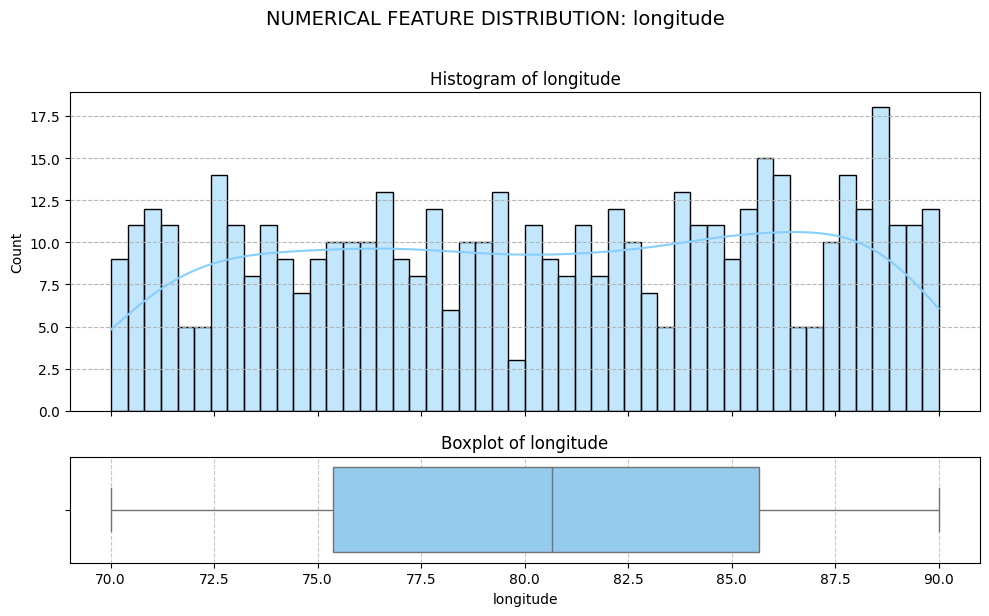

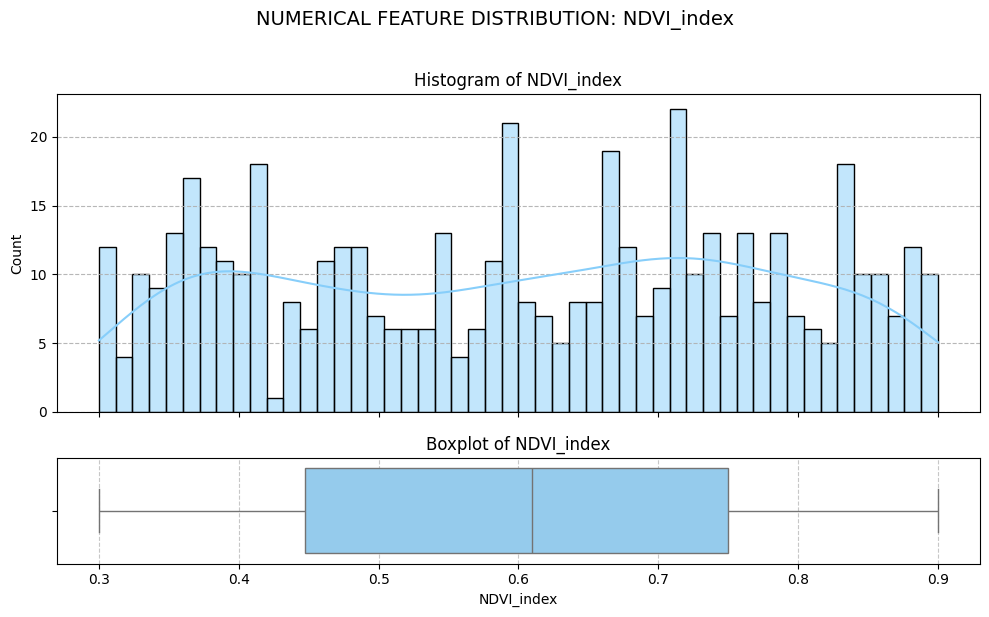

In [50]:
for col in numerical_features:
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

    # Histograma con KDE
    sns.histplot(df[col], bins=50, kde=True, color='lightskyblue', ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].grid(True, axis='y', linestyle='--', alpha=0.9)

    # Boxplot horizontal
    sns.boxplot(x=df[col], color='lightskyblue', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].grid(True, axis='x', linestyle='--', alpha=0.7)

    plt.suptitle(f'NUMERICAL FEATURE DISTRIBUTION: {col}', y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

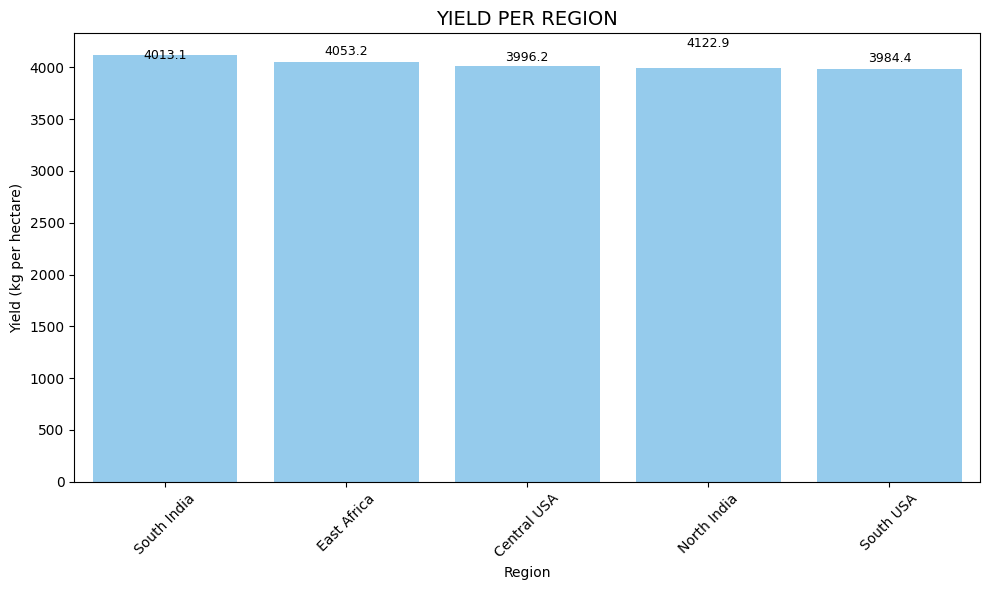

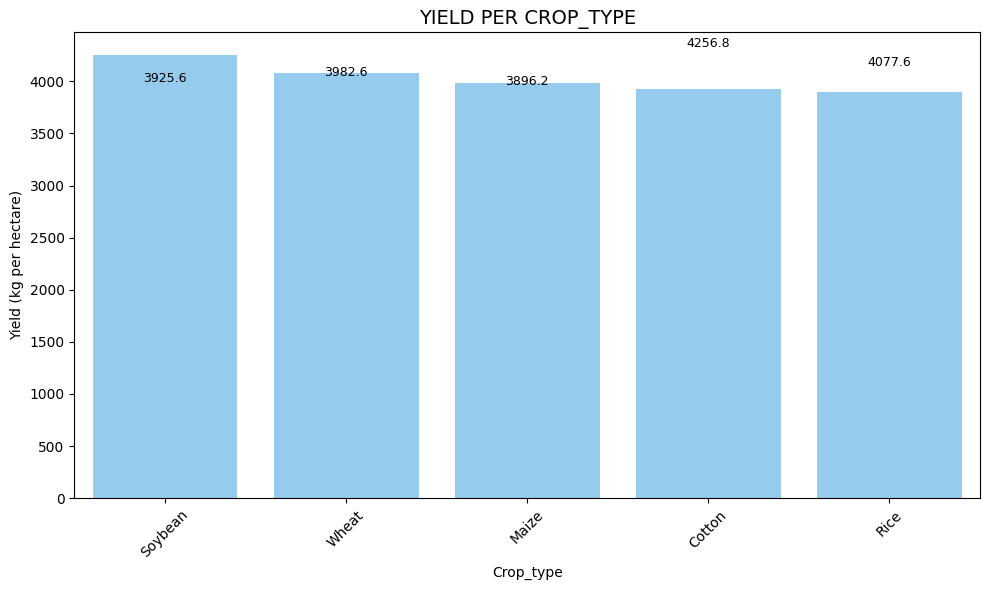

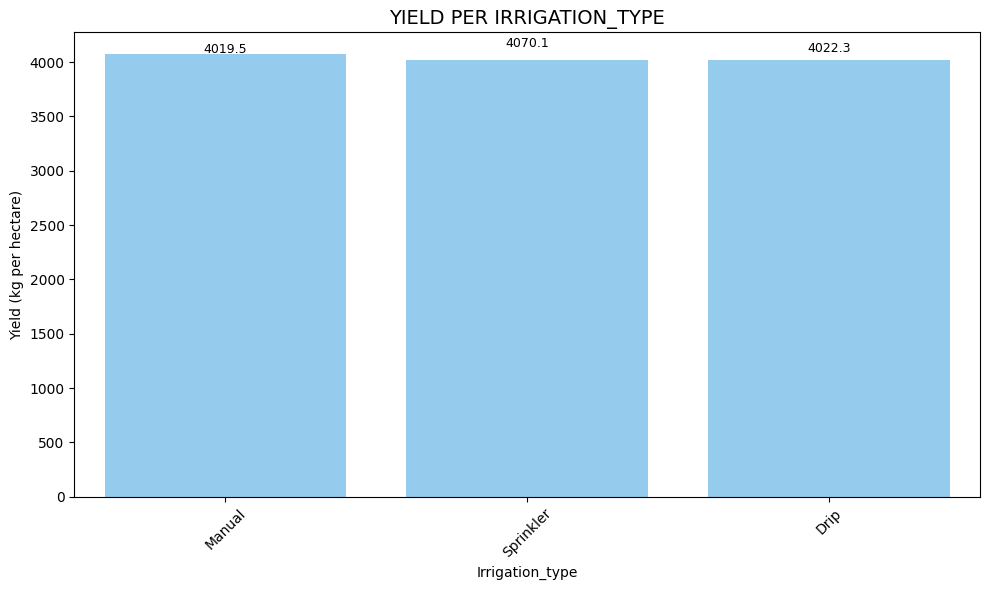

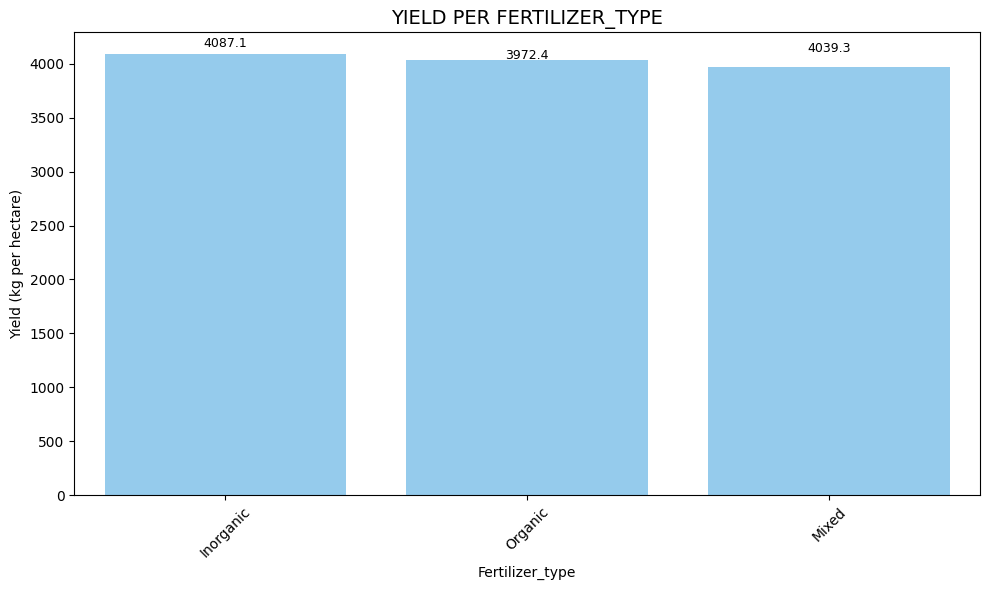

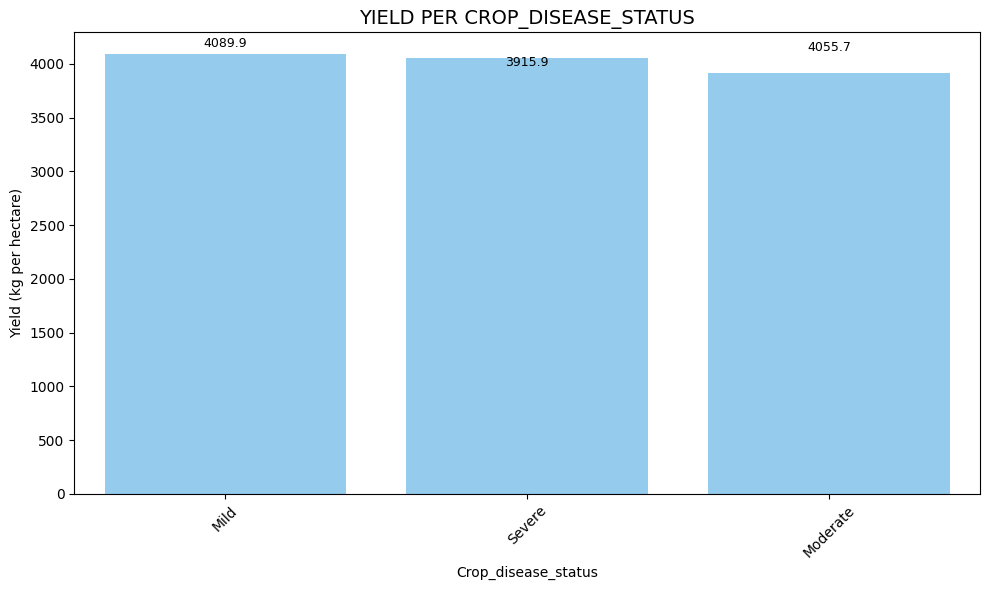

In [45]:
for col in categorical_features:
    mean_df = df.groupby(col)['yield_kg_per_hectare'].mean().reset_index()
    mean_df = mean_df.sort_values('yield_kg_per_hectare', ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=mean_df, x=col, y='yield_kg_per_hectare', color='lightskyblue')

    # Añadir los valores encima de cada barra
    for i, row in mean_df.iterrows():
        ax.text(i, row['yield_kg_per_hectare'] + 0.01 * mean_df['yield_kg_per_hectare'].max(),
                f"{row['yield_kg_per_hectare']:.1f}", ha='center', va='bottom', fontsize=9)

    plt.title(f'YIELD PER {col.upper()}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Yield (kg per hectare)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

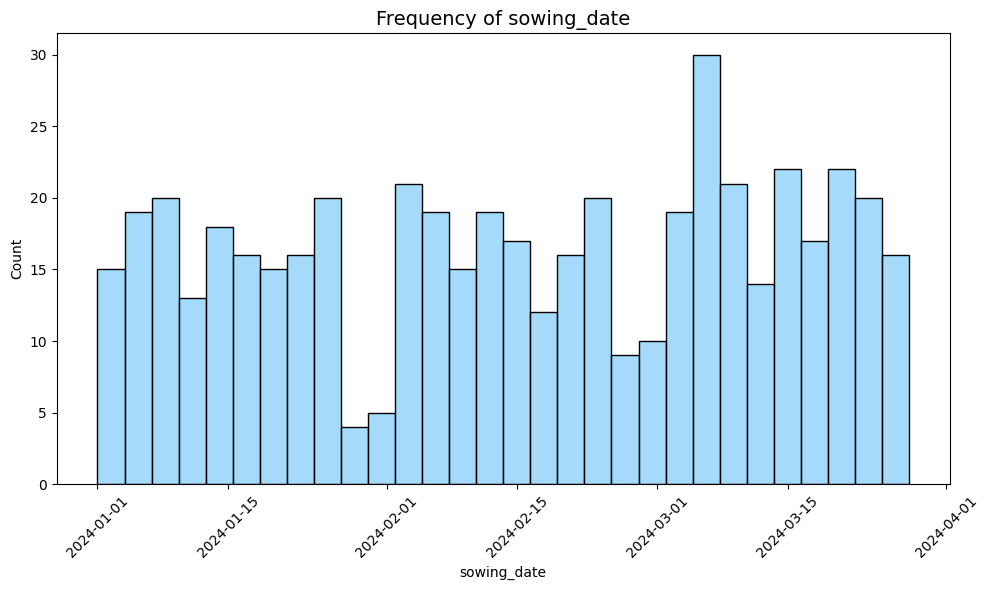

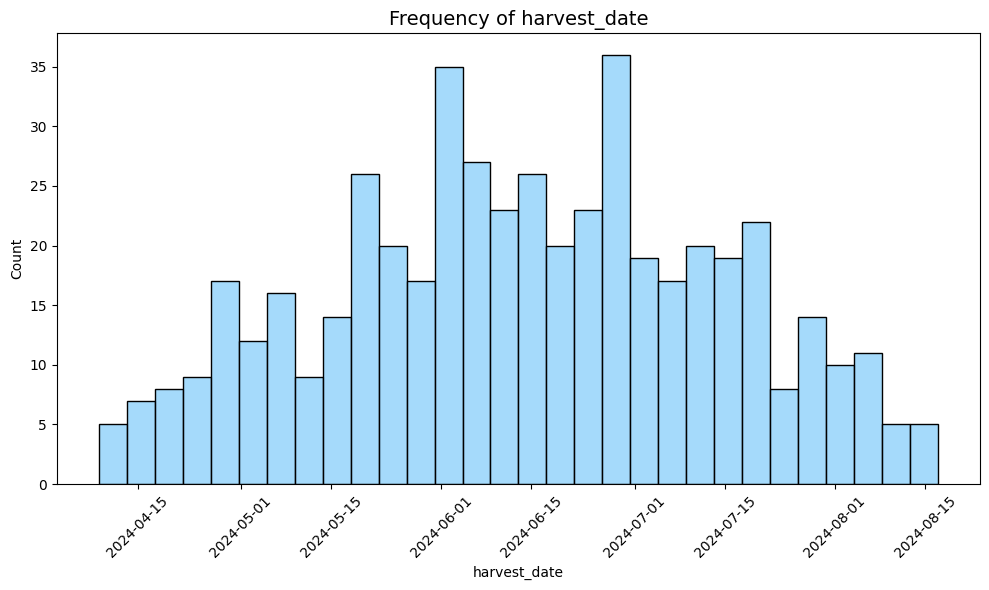

In [46]:
for col in date_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, color='lightskyblue', bins=30)  # puedes ajustar 'bins' si hace falta
    plt.title(f'Frequency of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

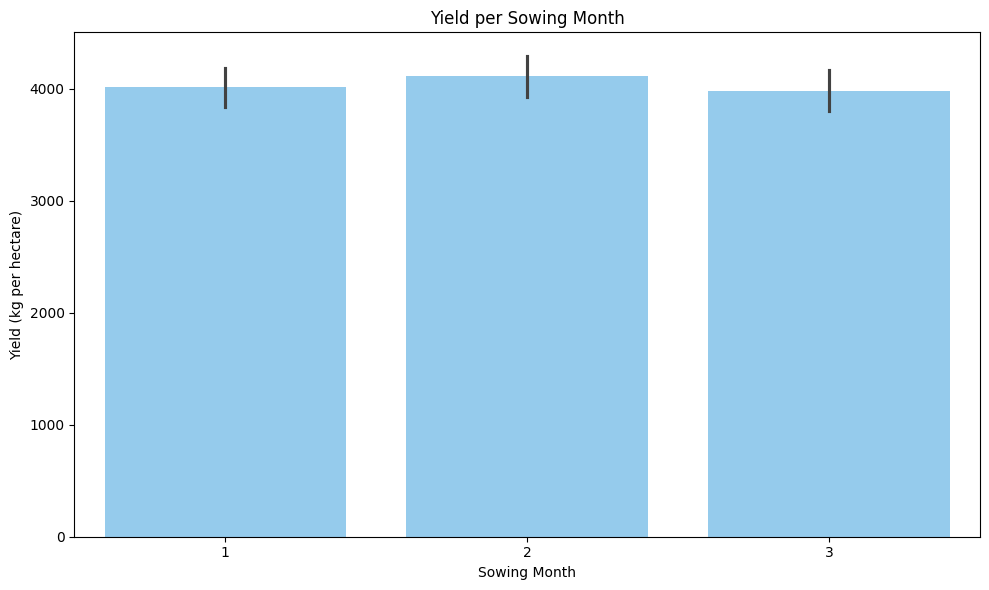

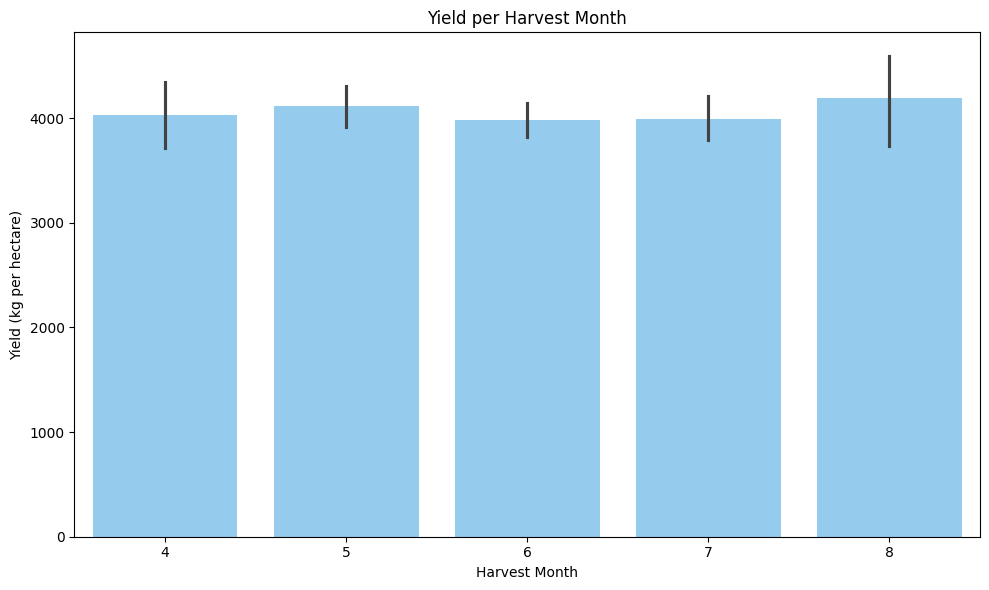

In [55]:
# Asegurar que las fechas están en formato datetime
df['sowing_date'] = pd.to_datetime(df['sowing_date'])
df['harvest_date'] = pd.to_datetime(df['harvest_date'])

# Extraer el mes
df['sowing_month'] = df['sowing_date'].dt.month
df['harvest_month'] = df['harvest_date'].dt.month

# Boxplot por mes de siembra
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sowing_month', y='yield_kg_per_hectare', color='lightskyblue')
plt.title('Yield per Sowing Month')
plt.xlabel('Sowing Month')
plt.ylabel('Yield (kg per hectare)')
plt.tight_layout()
plt.show()

# Boxplot por mes de cosecha
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='harvest_month', y='yield_kg_per_hectare', color='lightskyblue')
plt.title('Yield per Harvest Month')
plt.xlabel('Harvest Month')
plt.ylabel('Yield (kg per hectare)')
plt.tight_layout()
plt.show()


# 🌾 Detailed Insight on the Smart Farming Sensor Dataset

## 1. General Overview of the Dataset
The dataset simulates real-world smart farming operations driven by IoT sensors and satellite data. It captures environmental and operational variables affecting crop yield across 500 farms located in regions such as India, the USA, and Africa.

---

## 2. Data Quality and Structure

**Completeness**:  
After imputing missing values in `irrigation_type` and `crop_disease_status` (using the mode), the dataset is complete and ready for analysis.

**Variable Types**:  
Balanced mix of:

- **Numerical**: `soil moisture`, `pH`, `temperature`, `NDVI`, etc.  
- **Categorical**: `region`, `crop type`, `irrigation type`, `fertilizer type`, `disease status`.

**Dates**: `sowing_date` and `harvest_date` allow extraction of:

- `sowing_month`  
- `harvest_month`  
- `crop cycle duration`

---

## 3. Distribution and Key Trends

### 🌱 Yield (`yield_kg_per_hectare`)
- Distribution shows skewness and outliers (some farms perform significantly better or worse).
- Yield varies by:
  - Region
  - Crop type
  - Farming practices

### 🔢 Categorical Variables
- Most common irrigation: **Sprinkler → Manual → Drip**
- Frequent disease statuses: **Severe, Mild** → crop health is a challenge.

### 🌡️ Numerical Variables
High variability in:

- Soil moisture  
- Temperature  
- Rainfall  
- Pesticide usage  

Reflects diversity in environmental and farming conditions.

---

## 4. Relationships and Impact on Yield

### 🌍 By Region and Crop Type
- Yield varies notably by region and crop.
- Some combinations consistently outperform others → potential for diversification or specialization.

### 🚜 Agricultural Practices
- **Irrigation and fertilizer type** matter:
  - Drip irrigation + mixed fertilizers → better yield.
- **Pesticide usage** is uneven → possible link to disease control and yield.

### 🌞 Environmental Factors
Positive correlation between yield and:

- NDVI  
- Soil moisture  
- Sunlight hours

### 📅 Seasonality
- Sowing and harvest months impact yield.
- Reinforces importance of crop calendar planning.

---

## 5. Opportunities for Optimization and Prediction

- **Predictive Modeling**: Perfect dataset to train ML models for yield prediction.
- **Decision Support**: Key factors can feed recommendation systems tailored by region/crop.
- **Risk Identification**: Disease-yield links may help anticipate and prevent crop loss.

---

## 6. Recommendations for Dataset Users

🔍 **Explore Correlations**:  
Check correlation matrices among numerical variables (e.g., NDVI, moisture, temperature).

🧩 **Analyze Interactions**:  
Study combinations of practices + environment (e.g., irrigation × fertilizer).

🗺️ **Regional Visualization**:  
Use maps/dashboards to analyze efficiency and challenges by area.

---

## ✅ Conclusion
The Smart Farming Sensor Dataset offers a rich, realistic view of modern agriculture. It enables the identification of key yield drivers, supports predictive modeling, and provides valuable insight for agricultural optimization and decision-making.